Question 1 :a part)backpropagation

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


input dimension torch.Size([3, 183, 276])


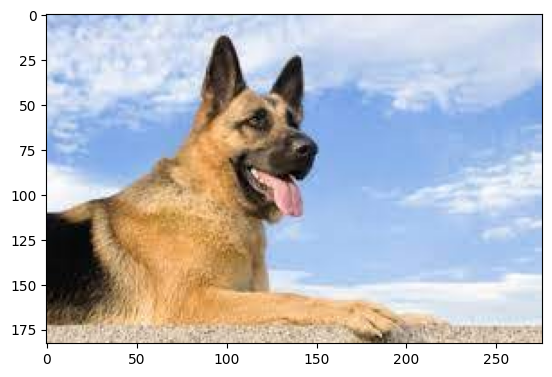

compatible input dimension torch.Size([1, 3, 183, 276])
resnet output layer torch.Size([1, 1000])
torch.return_types.max(
values=tensor([10.8534], grad_fn=<MaxBackward0>),
indices=tensor([235]))
class no./name predicted 235, German_shepherd
visulation_of_responsibe dim torch.Size([1, 3, 183, 276])
visulation_of_responsibe


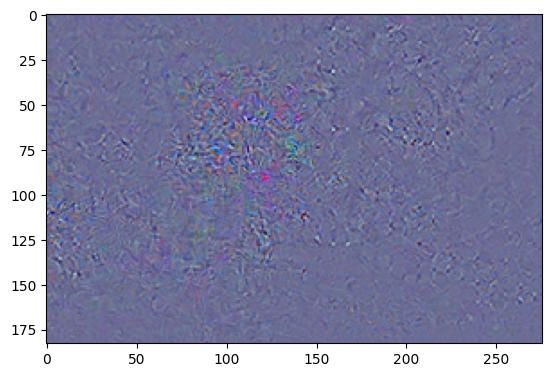

input dimension torch.Size([3, 194, 259])


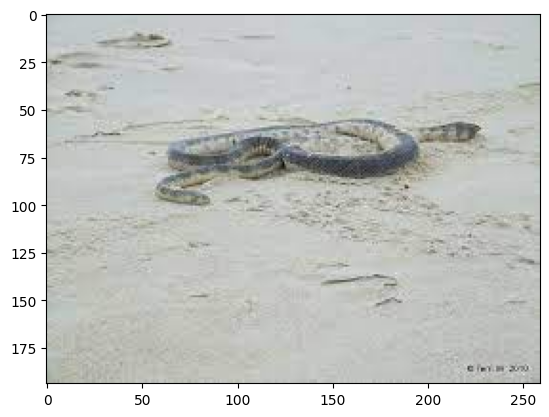

compatible input dimension torch.Size([1, 3, 194, 259])
resnet output layer torch.Size([1, 1000])
torch.return_types.max(
values=tensor([6.6387], grad_fn=<MaxBackward0>),
indices=tensor([111]))
class no./name predicted 111, nematode
visulation_of_responsibe dim torch.Size([1, 3, 194, 259])
visulation_of_responsibe


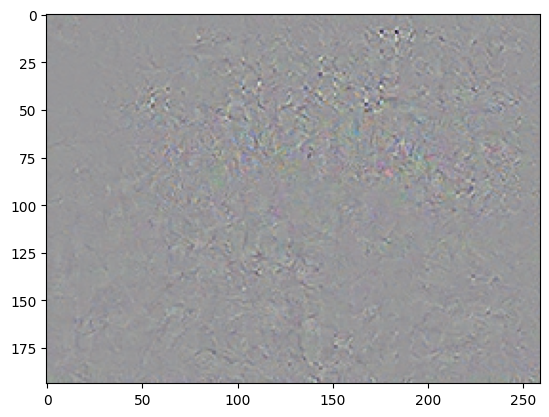

input dimension torch.Size([3, 194, 259])


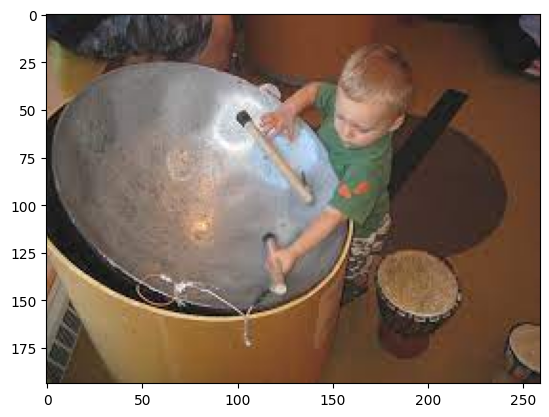

compatible input dimension torch.Size([1, 3, 194, 259])
resnet output layer torch.Size([1, 1000])
torch.return_types.max(
values=tensor([8.1934], grad_fn=<MaxBackward0>),
indices=tensor([459]))
class no./name predicted 459, brassiere
visulation_of_responsibe dim torch.Size([1, 3, 194, 259])
visulation_of_responsibe


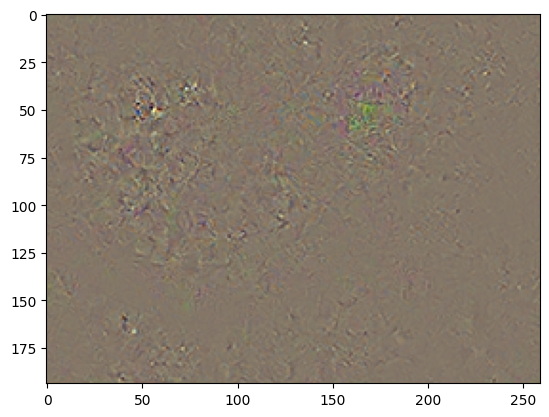

input dimension torch.Size([3, 186, 271])


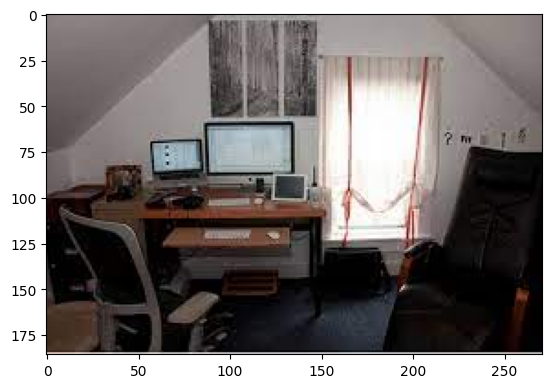

compatible input dimension torch.Size([1, 3, 186, 271])
resnet output layer torch.Size([1, 1000])
torch.return_types.max(
values=tensor([7.8635], grad_fn=<MaxBackward0>),
indices=tensor([894]))
class no./name predicted 894, wardrobe
visulation_of_responsibe dim torch.Size([1, 3, 186, 271])
visulation_of_responsibe


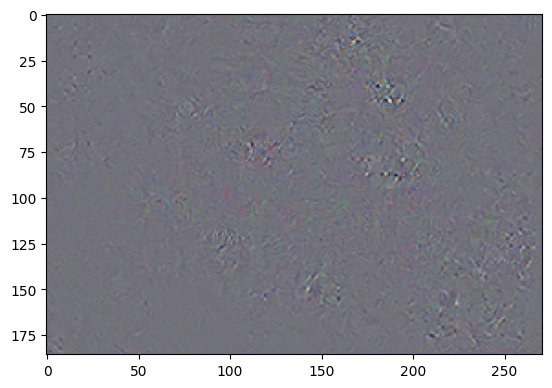

input dimension torch.Size([3, 194, 259])


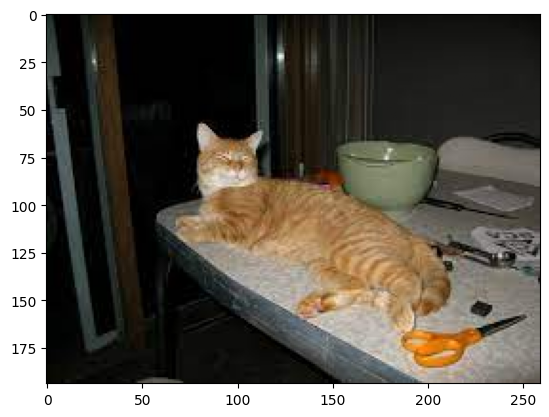

compatible input dimension torch.Size([1, 3, 194, 259])
resnet output layer torch.Size([1, 1000])
torch.return_types.max(
values=tensor([8.8318], grad_fn=<MaxBackward0>),
indices=tensor([700]))
class no./name predicted 700, paper_towel
visulation_of_responsibe dim torch.Size([1, 3, 194, 259])
visulation_of_responsibe


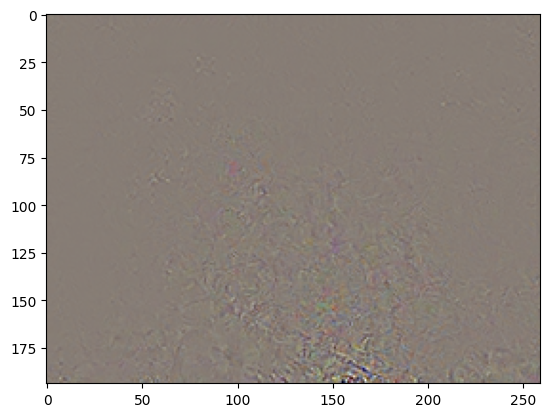

In [61]:
from PIL import Image
import torchvision.transforms as transforms
transform=transforms.ToTensor()

import torch
import matplotlib.pyplot as plt
import torchvision
import numpy as np

####since our visualisation_of_responsble image has negative pixel values(not possible) we need to normalize it before sending it to imshow to plot
    ##this normalisation is just like percentage of each pixel not standard normal normalisation
def norm_image(grads_norm ):
    grads_norm[0,:,:] = (grads_norm[0,:,:] - torch.min(grads_norm[0,:,:]))/ (torch.max(grads_norm[0,:,:])- torch.min(grads_norm[0,:,:]))
    grads_norm[1,:,:] = (grads_norm[1,:,:] - torch.min(grads_norm[1,:,:]))/ (torch.max(grads_norm[1,:,:])- torch.min(grads_norm[1,:,:]))
    grads_norm[2,:,:] = (grads_norm[2,:,:] - torch.min(grads_norm[2,:,:]))/ (torch.max(grads_norm[2,:,:])- torch.min(grads_norm[2,:,:]))
    return grads_norm

resnet=torchvision.models.resnet50(pretrained=True)
#the structure where pool ,convolve
#print(resnet)


#evalvaluation mode
resnet.eval()

def backpropagation(imgtensor):
    print("input dimension",imgtensor.size())
    plt.imshow(imgtensor.permute(1,2,0))
    plt.show()
    #dir(torchvision.models)


    #make the input to include batch dimension 1 lets call it batch dimension
    imgtensor=torch.unsqueeze(imgtensor,0)
    print("compatible input dimension",imgtensor.size())




    #so that we can compute gradients latter
    imgtensor.requires_grad=True


    output=resnet(imgtensor)


    #scores for 1000 classes
    print("resnet output layer",output.shape)


    with open('imagenet_classes.txt') as f:
        classes=[line.strip() for line in f.readlines()] 
    #print(classes)



    #highest predicted score at the value index(class) in the 1st dimension output(columns) tensor not in 0th dimension(rows)
    print(torch.max(output,1))
    val,index=torch.max(output,1)

    print("class no./name predicted",classes[index])

    #print(type(resnet.modules()))
    #for i, module in enumerate(resnet.modules()):
        #print(i,module)


    #builtin functions to do backpropagation

    ################################ we will diffentiate highest predicted neuron wrt to all input pixels ...all the values arranged at the pixel place will be the responsibility of that pixel to the score of highest predicted output..    ##############
    ### this will compute the required gradients through the chain rule via the pooling functions,relus,normalizations
    
    
    #imgtensor tensor has dimension (1,3,183,276) whree the very first dim is for batch_size=1

    ###built in autograd
    visulation_of_responsibe=torch.autograd.grad(outputs=val, inputs=imgtensor)[0]
    
    
    print("visulation_of_responsibe dim",visulation_of_responsibe.size())
    print("visulation_of_responsibe")
    #normlise before plotting
    plt.imshow(norm_image(visulation_of_responsibe[0]).permute(1,2,0))
    plt.show()


img=Image.open("i1.jpg")
imgtensor=transform(img)
backpropagation(imgtensor)


img=Image.open("i2.jpg")
imgtensor=transform(img)
backpropagation(imgtensor)

img=Image.open("i3.jpg")
imgtensor=transform(img)
backpropagation(imgtensor)

img=Image.open("i4.jpg")
imgtensor=transform(img)
backpropagation(imgtensor)

img=Image.open("i5.jpg")
imgtensor=transform(img)
backpropagation(imgtensor)


# for i,module in enumerate(resnet.modules()):
#     print(i,module)

Question 1: part b) guided back propagation

input dimension torch.Size([3, 183, 276])


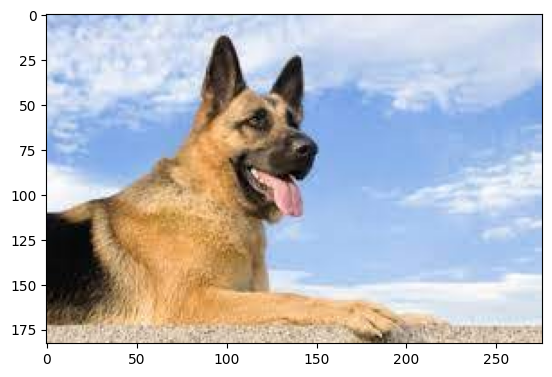

compatible input dimension torch.Size([1, 3, 183, 276])
output predicted scores by resnet torch.Size([1, 1000])
torch.return_types.max(
values=tensor([10.8534], grad_fn=<MaxBackward0>),
indices=tensor([235]))
class no/name 235, German_shepherd
val tensor(10.8534, grad_fn=<SelectBackward0>)
inputdimensions torch.Size([1, 3, 183, 276])
visulation_of_responsibe dimension torch.Size([1, 3, 183, 276])
minimum torch value tensor(-0.9992)
visulation_of_responsibe


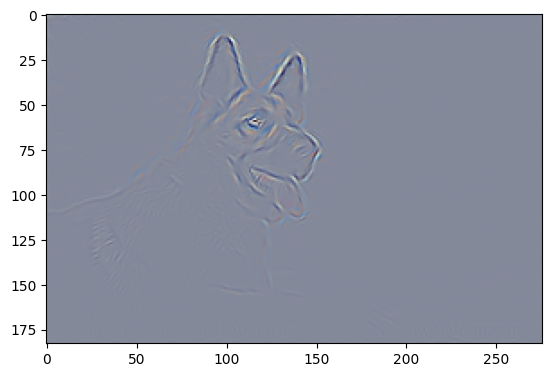

input dimension torch.Size([3, 194, 259])


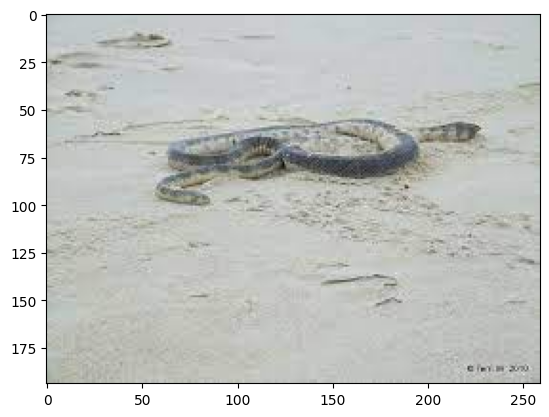

compatible input dimension torch.Size([1, 3, 194, 259])
output predicted scores by resnet torch.Size([1, 1000])
torch.return_types.max(
values=tensor([6.6387], grad_fn=<MaxBackward0>),
indices=tensor([111]))
class no/name 111, nematode
val tensor(6.6387, grad_fn=<SelectBackward0>)
inputdimensions torch.Size([1, 3, 194, 259])
visulation_of_responsibe dimension torch.Size([1, 3, 194, 259])
minimum torch value tensor(-0.2215)
visulation_of_responsibe


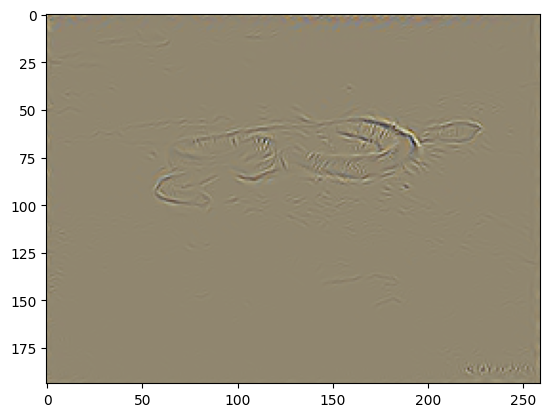

input dimension torch.Size([3, 194, 259])


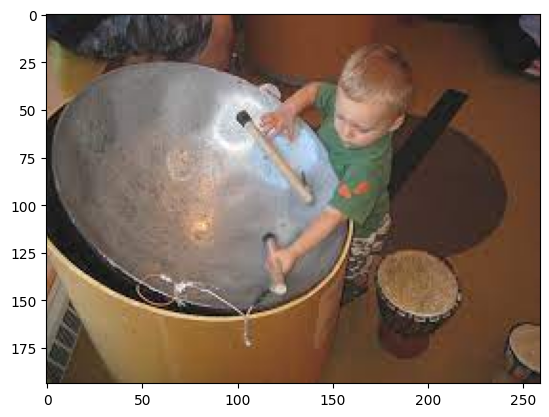

compatible input dimension torch.Size([1, 3, 194, 259])
output predicted scores by resnet torch.Size([1, 1000])
torch.return_types.max(
values=tensor([8.1934], grad_fn=<MaxBackward0>),
indices=tensor([459]))
class no/name 459, brassiere
val tensor(8.1934, grad_fn=<SelectBackward0>)
inputdimensions torch.Size([1, 3, 194, 259])
visulation_of_responsibe dimension torch.Size([1, 3, 194, 259])
minimum torch value tensor(-0.1812)
visulation_of_responsibe


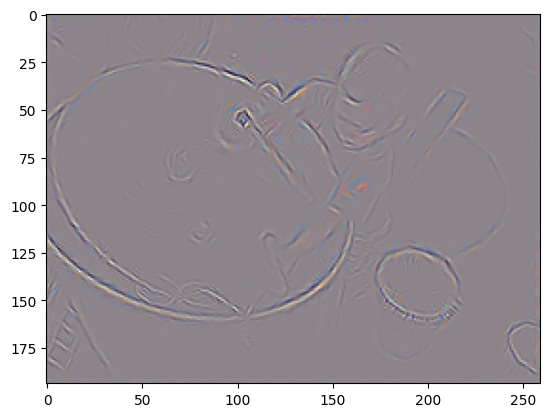

input dimension torch.Size([3, 186, 271])


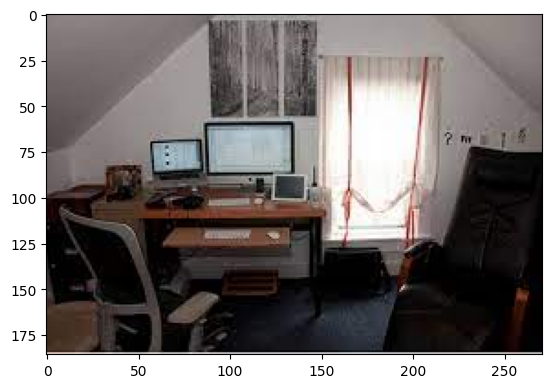

compatible input dimension torch.Size([1, 3, 186, 271])
output predicted scores by resnet torch.Size([1, 1000])
torch.return_types.max(
values=tensor([7.8635], grad_fn=<MaxBackward0>),
indices=tensor([894]))
class no/name 894, wardrobe
val tensor(7.8635, grad_fn=<SelectBackward0>)
inputdimensions torch.Size([1, 3, 186, 271])
visulation_of_responsibe dimension torch.Size([1, 3, 186, 271])
minimum torch value tensor(-0.1584)
visulation_of_responsibe


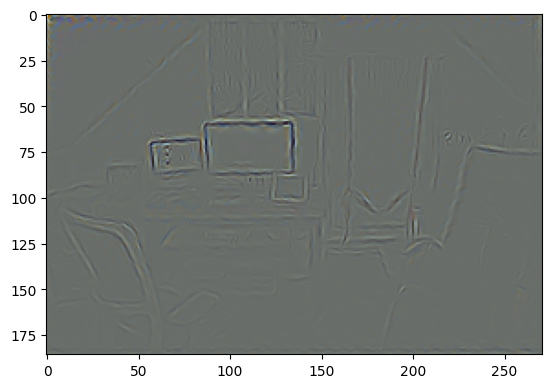

input dimension torch.Size([3, 194, 259])


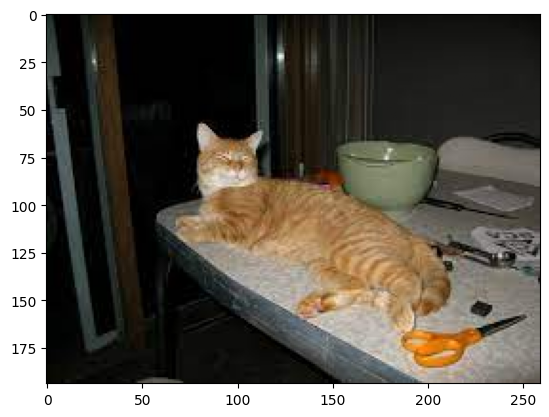

compatible input dimension torch.Size([1, 3, 194, 259])
output predicted scores by resnet torch.Size([1, 1000])
torch.return_types.max(
values=tensor([8.8318], grad_fn=<MaxBackward0>),
indices=tensor([700]))
class no/name 700, paper_towel
val tensor(8.8318, grad_fn=<SelectBackward0>)
inputdimensions torch.Size([1, 3, 194, 259])
visulation_of_responsibe dimension torch.Size([1, 3, 194, 259])
minimum torch value tensor(-0.6080)
visulation_of_responsibe


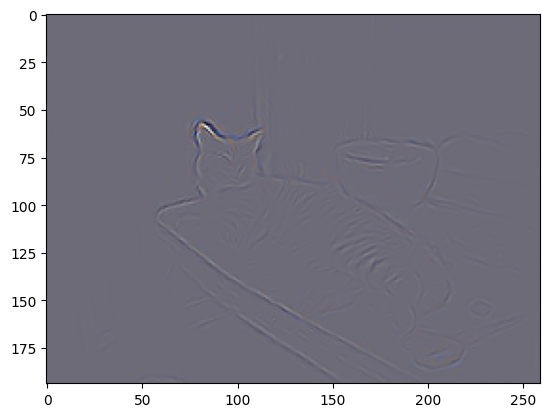

In [63]:
##key idea in the guided backpropagation .when we do one step back we need to make all gradients<0 =0 in case of actiavations relus ...this will focus more on the valuable pixels


resnet=torchvision.models.resnet50(pretrained=True)


#the structure where pool ,convolve,where normalisation
#print(resnet)


#evalvaluation mode
resnet.eval()


## we take care of this only with help of hooks
# forward hook (executing after the forward pass),
# backward hook (executing after the backward pass).
#means in case of backward pass grad_in are the already computed by backpropagation from grad_out at the layer


#inspecting the resnet 50 modules we can use hooks on the specific layers

def relu_hook_function(module, grad_in, grad_out):
    if isinstance(module, torch.nn.ReLU):
        return (torch.clamp(grad_in[0], min=0.0),)
        #clam all negative values to 0
    
for i, module in enumerate(resnet.modules()):
    if isinstance(module, torch.nn.ReLU):
        module.register_backward_hook(relu_hook_function)


def guidedbackpropagation(imgtensor):
    print("input dimension",imgtensor.size())
    plt.imshow(imgtensor.permute(1,2,0))
    plt.show()
    #dir(torchvision.models)


    #make the input to include batch dimension 1 lets call it batch dimension
    imgtensor=torch.unsqueeze(imgtensor,0)
    print("compatible input dimension",imgtensor.size())




    #so that we can compute gradients latter
    imgtensor.requires_grad=True


    output=resnet(imgtensor)


    #scores for 1000 classes
    print("output predicted scores by resnet",output.shape)


    with open('imagenet_classes.txt') as f:
        classes=[line.strip() for line in f.readlines()] 
    #print(classes)



     #highest predicted score at the value index(class) in the 1st dimension output(columns) tensor not in 0th dimension(rows)
    print(torch.max(output,1))
    val,index=torch.max(output,1)

    print("class no/name",classes[index])

    #print(type(resnet.modules()))
    #for i, module in enumerate(resnet.modules()):
        #print(i,module)


    #builtin functions to do backpropagation

    ################################ we will diffentiate highest predicted neuron wrt to all input pixels ...all the values arranged at the pixel place will responsibility of that pixel to the score of highest predicted output..    ##############
    ### this will compute the required gradients through the chain rule via the pooling functions,relus,normalization 
    val=val[0]
    print("val",val)

    print("inputdimensions",imgtensor.size())
    #imgtensor tensor has dimension (1,3,183,276) whree the very first dim is for batch_size=1
    visulation_of_responsibe=torch.autograd.grad(outputs=val, inputs=imgtensor)[0]
    print("visulation_of_responsibe dimension",visulation_of_responsibe.size())
    
    #to chech all guided propagation is in correct way or not
    print("minimum torch value",torch.min(visulation_of_responsibe[0]))
    print("visulation_of_responsibe")
    plt.imshow(norm_image(visulation_of_responsibe[0]).permute(1,2,0))
    plt.show()


img=Image.open("i1.jpg")
imgtensor=transform(img)
guidedbackpropagation(imgtensor)

img=Image.open("i2.jpg")
imgtensor=transform(img)
guidedbackpropagation(imgtensor)

img=Image.open("i3.jpg")
imgtensor=transform(img)
guidedbackpropagation(imgtensor)

img=Image.open("i4.jpg")
imgtensor=transform(img)
guidedbackpropagation(imgtensor)

img=Image.open("i5.jpg")
imgtensor=transform(img)
guidedbackpropagation(imgtensor)




Question 1: part c) CAM

imgtensor initial size torch.Size([3, 183, 276])
imgtensor compatible size torch.Size([1, 3, 183, 276])
required feature maps dimension: torch.Size([1, 2048, 6, 9])
required weights_correspond_high_output dimension: torch.Size([1, 2048])
torch.return_types.max(
values=tensor([10.8534], grad_fn=<MaxBackward0>),
indices=tensor([235]))
size of feature_maps_tensor torch.Size([1, 2048, 6, 9])
size of weights_correspond_high_output torch.Size([1, 2048])
empty CAM torch.Size([1, 6, 9])
CAM dim torch.Size([1, 6, 9])
numpy CAM shape  (6, 9, 1)


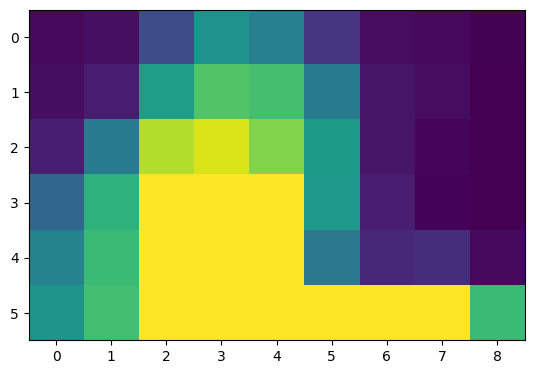

imgtensor initial size torch.Size([3, 194, 259])
imgtensor compatible size torch.Size([1, 3, 194, 259])
required feature maps dimension: torch.Size([1, 2048, 7, 9])
required weights_correspond_high_output dimension: torch.Size([1, 2048])
torch.return_types.max(
values=tensor([6.6387], grad_fn=<MaxBackward0>),
indices=tensor([111]))
size of feature_maps_tensor torch.Size([1, 2048, 7, 9])
size of weights_correspond_high_output torch.Size([1, 2048])
empty CAM torch.Size([1, 7, 9])
CAM dim torch.Size([1, 7, 9])
numpy CAM shape  (7, 9, 1)


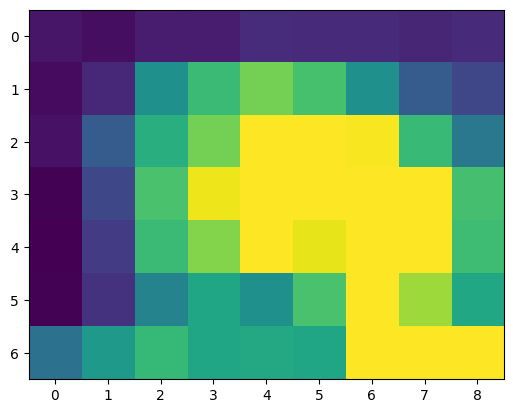

imgtensor initial size torch.Size([3, 194, 259])
imgtensor compatible size torch.Size([1, 3, 194, 259])
required feature maps dimension: torch.Size([1, 2048, 7, 9])
required weights_correspond_high_output dimension: torch.Size([1, 2048])
torch.return_types.max(
values=tensor([8.1934], grad_fn=<MaxBackward0>),
indices=tensor([459]))
size of feature_maps_tensor torch.Size([1, 2048, 7, 9])
size of weights_correspond_high_output torch.Size([1, 2048])
empty CAM torch.Size([1, 7, 9])
CAM dim torch.Size([1, 7, 9])
numpy CAM shape  (7, 9, 1)


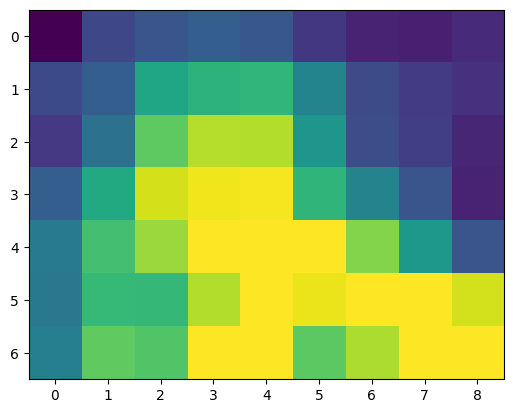

imgtensor initial size torch.Size([3, 186, 271])
imgtensor compatible size torch.Size([1, 3, 186, 271])
required feature maps dimension: torch.Size([1, 2048, 6, 9])
required weights_correspond_high_output dimension: torch.Size([1, 2048])
torch.return_types.max(
values=tensor([7.8635], grad_fn=<MaxBackward0>),
indices=tensor([894]))
size of feature_maps_tensor torch.Size([1, 2048, 6, 9])
size of weights_correspond_high_output torch.Size([1, 2048])
empty CAM torch.Size([1, 6, 9])
CAM dim torch.Size([1, 6, 9])
numpy CAM shape  (6, 9, 1)


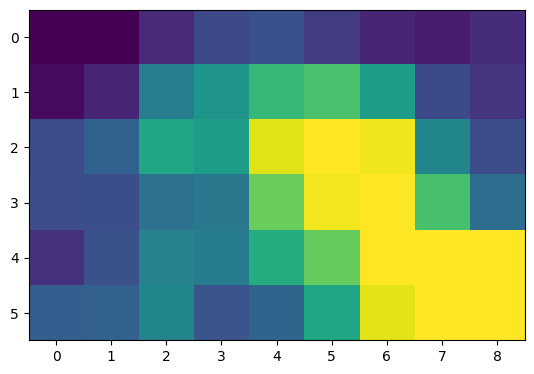

imgtensor initial size torch.Size([3, 194, 259])
imgtensor compatible size torch.Size([1, 3, 194, 259])
required feature maps dimension: torch.Size([1, 2048, 7, 9])
required weights_correspond_high_output dimension: torch.Size([1, 2048])
torch.return_types.max(
values=tensor([8.8318], grad_fn=<MaxBackward0>),
indices=tensor([700]))
size of feature_maps_tensor torch.Size([1, 2048, 7, 9])
size of weights_correspond_high_output torch.Size([1, 2048])
empty CAM torch.Size([1, 7, 9])
CAM dim torch.Size([1, 7, 9])
numpy CAM shape  (7, 9, 1)


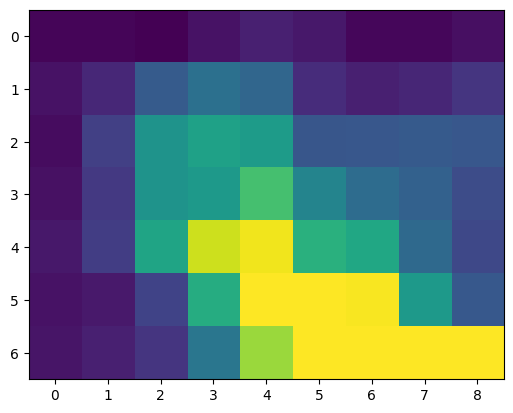

In [64]:
#for the class activation map corresponding to the highest predicted output neuron
#i need the all feature maps just before the GAP and weights connecting the all GAPs neurons in MLP to highest predicted output
#we will again use hooks for the builtin resnet50
#these hooks will track above things during the forward pass(feature_maps_tensor)


## we take care of this only with help of hooks
# forward hook (executing after the forward pass),
# backward hook (executing after the backward pass).
#means in case of backward pass grad_in are the already computed by backpropagation from grad_out at the layer


####CAM is the weighted sum of feature maps



##inspecting the resnet builtin we can use hooks on required layers

resnet=torchvision.models.resnet50(pretrained=True)

#put the model in the evaluation mode
resnet.eval()

feature_maps_tensor=[]
weights_correspond_high_output=[] 

def hook_feature_maps(module,in_put,out_put):
    if isinstance(module,torch.nn.AdaptiveAvgPool2d):
        print("required feature maps dimension:",in_put[0].size())
        #print(out_put[0].size()) is 2048 channels and 1*1 dim indicates that it GAP
        #to modify value of a outside the function entity 
        global feature_maps_tensor
        feature_maps_tensor=in_put[0]
        

def hook_weights_correspond_high_output(module,in_put,out_put):
    #weights in the fully connected layer wrt highest predicted neuron before backpropagating through 
    if isinstance(module,torch.nn.Linear):
        global weights_correspond_high_output
        val,ind=torch.max(out_put,1)
        print("required weights_correspond_high_output dimension:",module.weight.data[ind].size())
        weights_correspond_high_output=module.weight.data[ind]
        
for i,module in enumerate(resnet.modules()):
        if isinstance(module,torch.nn.AdaptiveAvgPool2d):
            module.register_forward_hook(hook_feature_maps)
        if isinstance(module,torch.nn.Linear):
            module.register_forward_hook(hook_weights_correspond_high_output)


    
            
def ClassActivationMap(imgtensor):
    print("imgtensor initial size",imgtensor.size())
    plt.imshow(imgtensor.permute(1,2,0))
    imgtensor=torch.unsqueeze(imgtensor,0)
    print("imgtensor compatible size",imgtensor.size())

    output=resnet(imgtensor)

    print(torch.max(output,1))

    print("size of feature_maps_tensor",feature_maps_tensor.size())

    val,ind=torch.max(output,1)
    val=val[0]
    #during the required weights will be tracked

    print("size of weights_correspond_high_output",weights_correspond_high_output.size())

    ################### WE ARE COMPLETELY READY TO GET CAM just need of linear combination ####################


    CAM=torch.zeros((1,len(feature_maps_tensor[0,0,:,0]),len(feature_maps_tensor[0,0,0,:])))
    print("empty CAM",CAM.size())
    for i in range(0,len(weights_correspond_high_output[0,:])):
        CAM[0]=CAM[0]+ (weights_correspond_high_output[0][i].item())*feature_maps_tensor[0][i]

    print("CAM dim",CAM.size())


    #normalising the pixels since some of them are negative
    for i in range(0,len(CAM[0,:,0])):
        for j in range(0,len(CAM[0,0,:])):
            CAM[0][i][j]=(CAM[0][i][j]-torch.min(CAM))/(torch.max(CAM)-torch.min(CAM))
    CAM=(CAM.permute(1,2,0)).detach().numpy()

    print("numpy CAM shape ",np.shape(CAM))
    plt.imshow(CAM)
    plt.show()
    
img=Image.open("i1.jpg")
imgtensor=transform(img) 
ClassActivationMap(imgtensor)

img=Image.open("i2.jpg")
imgtensor=transform(img) 
ClassActivationMap(imgtensor)

img=Image.open("i3.jpg")
imgtensor=transform(img) 
ClassActivationMap(imgtensor)

img=Image.open("i4.jpg")
imgtensor=transform(img) 
ClassActivationMap(imgtensor)

img=Image.open("i5.jpg")
imgtensor=transform(img) 
ClassActivationMap(imgtensor)


Question 1: part d) guided grad CAM

imgtensor initial size torch.Size([3, 183, 276])


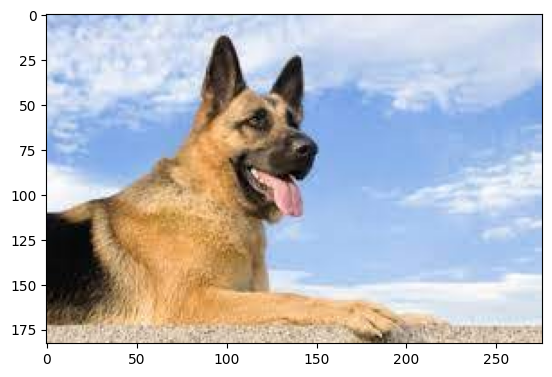

imgtensor compatible size torch.Size([1, 3, 183, 276])
required feature maps dimension: torch.Size([1, 64, 92, 138])
torch.return_types.max(
values=tensor([10.8534], grad_fn=<MaxBackward0>),
indices=tensor([235]))
size of feature_maps_tensor torch.Size([1, 64, 92, 138])
 `dimension of weight_tensor containing gradients wrt to feature_maps`  torch.Size([1, 64, 92, 138])
gCAM dim torch.Size([1, 92, 138])
numpy gCAM shape  (92, 138, 1)


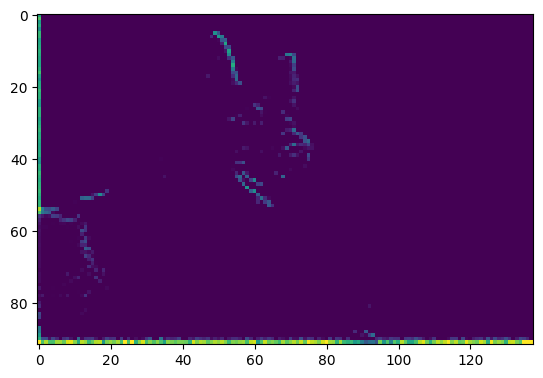

imgtensor initial size torch.Size([3, 194, 259])


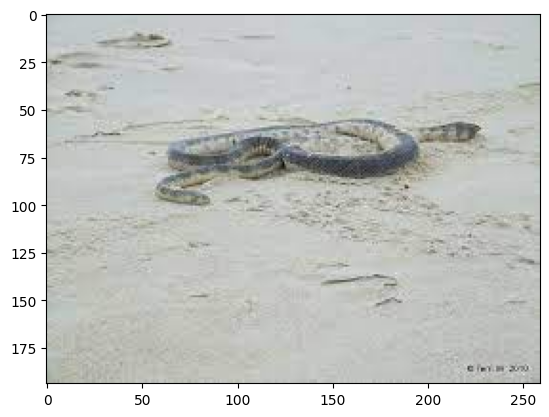

imgtensor compatible size torch.Size([1, 3, 194, 259])
required feature maps dimension: torch.Size([1, 64, 97, 130])
torch.return_types.max(
values=tensor([6.6387], grad_fn=<MaxBackward0>),
indices=tensor([111]))
size of feature_maps_tensor torch.Size([1, 64, 97, 130])
 `dimension of weight_tensor containing gradients wrt to feature_maps`  torch.Size([1, 64, 97, 130])
gCAM dim torch.Size([1, 97, 130])
numpy gCAM shape  (97, 130, 1)


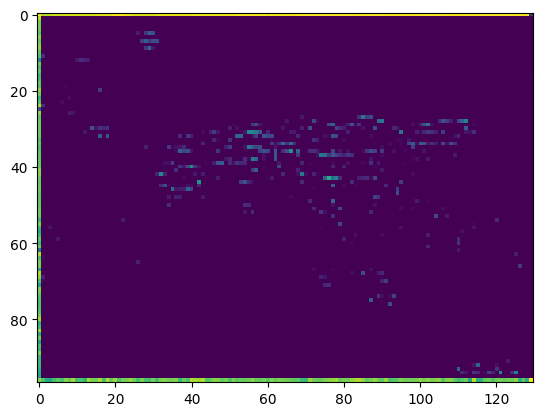

imgtensor initial size torch.Size([3, 194, 259])


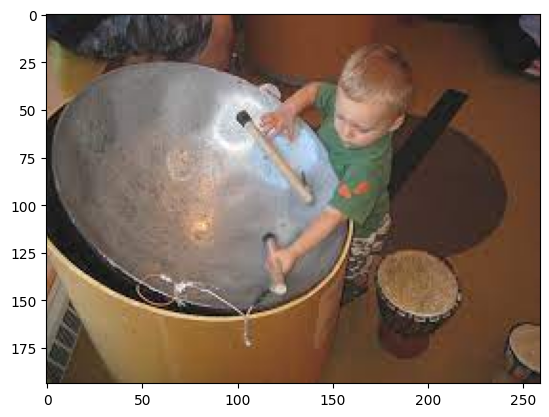

imgtensor compatible size torch.Size([1, 3, 194, 259])
required feature maps dimension: torch.Size([1, 64, 97, 130])
torch.return_types.max(
values=tensor([8.1934], grad_fn=<MaxBackward0>),
indices=tensor([459]))
size of feature_maps_tensor torch.Size([1, 64, 97, 130])
 `dimension of weight_tensor containing gradients wrt to feature_maps`  torch.Size([1, 64, 97, 130])
gCAM dim torch.Size([1, 97, 130])
numpy gCAM shape  (97, 130, 1)


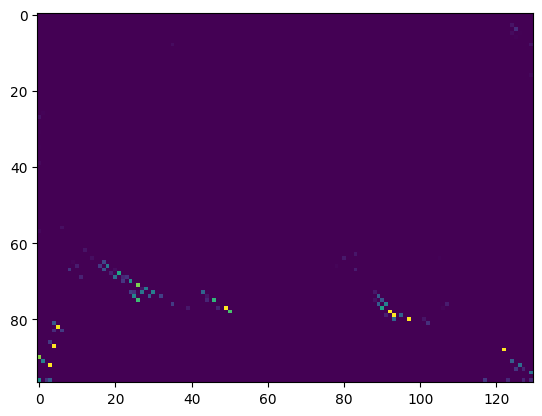

imgtensor initial size torch.Size([3, 186, 271])


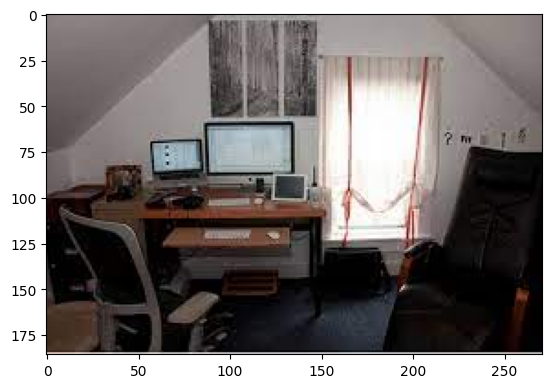

imgtensor compatible size torch.Size([1, 3, 186, 271])
required feature maps dimension: torch.Size([1, 64, 93, 136])
torch.return_types.max(
values=tensor([7.8635], grad_fn=<MaxBackward0>),
indices=tensor([894]))
size of feature_maps_tensor torch.Size([1, 64, 93, 136])
 `dimension of weight_tensor containing gradients wrt to feature_maps`  torch.Size([1, 64, 93, 136])
gCAM dim torch.Size([1, 93, 136])
numpy gCAM shape  (93, 136, 1)


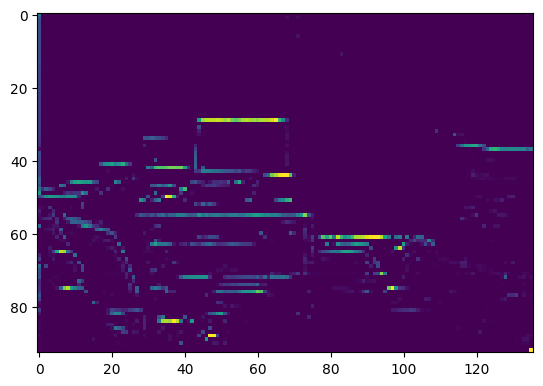

imgtensor initial size torch.Size([3, 194, 259])


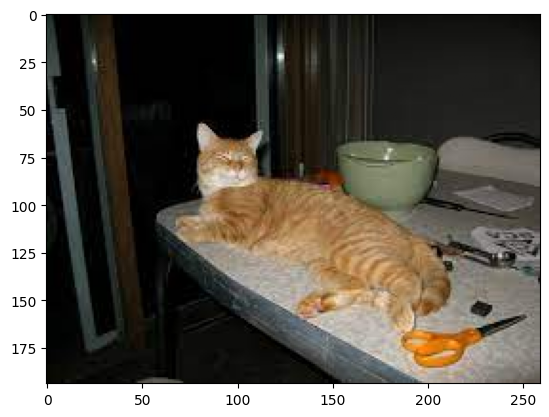

imgtensor compatible size torch.Size([1, 3, 194, 259])
required feature maps dimension: torch.Size([1, 64, 97, 130])
torch.return_types.max(
values=tensor([8.8318], grad_fn=<MaxBackward0>),
indices=tensor([700]))
size of feature_maps_tensor torch.Size([1, 64, 97, 130])
 `dimension of weight_tensor containing gradients wrt to feature_maps`  torch.Size([1, 64, 97, 130])
gCAM dim torch.Size([1, 97, 130])
numpy gCAM shape  (97, 130, 1)


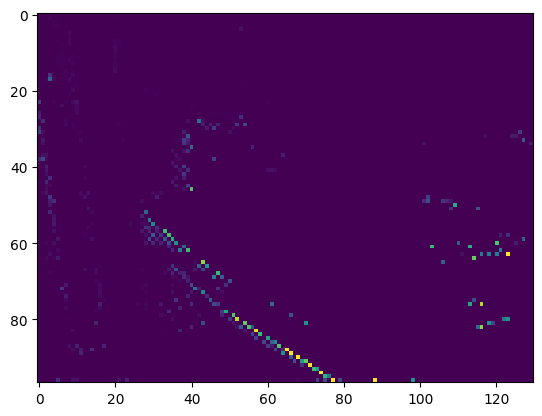

In [65]:
#all works in here are same as previous but difference is the weights of linear combination of features maps will be obtained by 
#by guided gradient.weight for the feature map i is the summation of the gradients of the highest output neuron wrt to each pixel in that feature map i
# say that as weight_tensor in which weights for all feature_maps are there

#As taught in class
#one important thing is that as early these faeture maps comes from input to output ,the resolution will be much better
#infact input image itself is fine as we have there 3 2d maps(rgb)

#here we will took the maps just after the first conv2d layer
#just by printing the modules of the resnet with their indices we get
#that module is conv2d and its index is 1 out of the resnet modules


resnet=torchvision.models.resnet50(pretrained=True)
resnet.eval()


#that module is conv2d and its index is 1 out of the resnet modules
def hook_feature_maps(module,in_put,out_put):
    if isinstance(module,torch.nn.Conv2d):
        print("required feature maps dimension:",out_put.size())
        global feature_maps_tensor
        feature_maps_tensor=out_put
        
        
#that module is conv2d and its index is 1 out of the resnet modules
for i,module in enumerate(resnet.modules()):
        if isinstance(module,torch.nn.Conv2d) and i==1:
            module.register_forward_hook(hook_feature_maps)
            

            
        
#this hook is for backward pass
def relu_hook_function(module, grad_in, grad_out):
    if isinstance(module, torch.nn.ReLU):
        return (torch.clamp(grad_in[0], min=0.0),)
        
for i,module in enumerate(resnet.modules()):
        if isinstance(module,torch.nn.ReLU):
            module.register_backward_hook(relu_hook_function)
        
feature_maps_tensor=[]

#explained what it is at the start of the cell
weight_tensor=[]

def guided_grad_cam(imgtensor):
    print("imgtensor initial size",imgtensor.size())
    plt.imshow(imgtensor.permute(1,2,0))
    plt.show()
    imgtensor=torch.unsqueeze(imgtensor,0)
    print("imgtensor compatible size",imgtensor.size())
    #remember to do it before passing it to resnet if want to calculte gradients using builtin
    imgtensor.requires_grad=True
    output=resnet(imgtensor)

    print(torch.max(output,1))

    print("size of feature_maps_tensor",feature_maps_tensor.size())
    
    
    val,ind=torch.max(output,1)
    val=val[0]
    
    #as proved in class weight for the feature map i is the summation of the gradients of the highest output neuron wrt to each pixel in feature map i
    
    ##problem will be there if the input to torch autograd will be feature_maps[0][0] or feature_maps[0] because others will be unused
    
    
    weight_tensor=torch.autograd.grad(outputs=val, inputs=feature_maps_tensor)[0]
    print(" `dimension of weight_tensor containing gradients wrt to feature_maps` ",weight_tensor.size())
    
    #we will store the sum of 2d gradients  in one channel .thus we get wights of linaer cobination.there are total 64 channels
    weight_tensor_gradsum=torch.zeros((1,len(weight_tensor[0,:,0,0])))
    
    for i in range(0,len(weight_tensor[0,:,0,0])):
        weight_tensor_gradsum[0][i]=torch.sum(weight_tensor[0][i])
    
    
    ################### WE ARE COMPLETELY READY TO GET gCAM just need of linear combination ####################


    gCAM=torch.zeros((1,len(feature_maps_tensor[0,0,:,0]),len(feature_maps_tensor[0,0,0,:])))
    for i in range(0,len(weight_tensor_gradsum[0,:])):
        gCAM[0]=gCAM[0]+ (weight_tensor_gradsum[0][i].item())*feature_maps_tensor[0][i]

    print("gCAM dim",gCAM.size())
    
    #ReLU step--- apply relu to each entry in the gCAM
    relu=torch.nn.ReLU(inplace=True)
    gCAM=relu(gCAM)
    
    #normalising the pixels since some of them are negative
    for i in range(0,len(gCAM[0,:,0])):
        for j in range(0,len(gCAM[0,0,:])):
            gCAM[0][i][j]=(gCAM[0][i][j]-torch.min(gCAM))/(torch.max(gCAM)-torch.min(gCAM))
            
    gCAM=(gCAM.permute(1,2,0)).detach().numpy()

    print("numpy gCAM shape ",np.shape(gCAM))
    plt.imshow(gCAM)
    plt.show()

    
    
img=Image.open("i1.jpg")
imgtensor=transform(img) 
guided_grad_cam(imgtensor)


img=Image.open("i2.jpg")
imgtensor=transform(img) 
guided_grad_cam(imgtensor)

img=Image.open("i3.jpg")
imgtensor=transform(img) 
guided_grad_cam(imgtensor)

img=Image.open("i4.jpg")
imgtensor=transform(img) 
guided_grad_cam(imgtensor)

img=Image.open("i5.jpg")
imgtensor=transform(img) 
guided_grad_cam(imgtensor)

Question 2: SGD Update rule variations

a) vanilla SGD

In [66]:

#initialised w =(10 15)
w=np.array([10,15])

#step size
eta=0.05

#gradient of function wrt w=(w1 w2) is (20*w1 2*w2)
grad=np.zeros((2))
sgd=[]

#(x,y) are being stored here
sgd.append(w)


#50 iterations
for i in range(0,50):
    grad[0]=20*w[0]
    grad[1]=2*w[1]
    w=w-eta*grad
    sgd.append(w)
    
print(w)

[0.         0.07730663]


b) SGD + momentum

In [67]:
#initialised w =(10 15)
w=np.array([10,15])

#step size
eta=0.05

#gradient of function wrt w=(w1 w2) is (20*w1 2*w2)
grad=np.zeros((2))

#friction coefficient
fric_coef=0.9
#initial velocity is 0
velocity=np.zeros((2))
sgdmom=[]

#(x,y) are being stored here
sgdmom.append(w)

#50 iterations
for i in range(0,50):
    grad[0]=20*w[0]
    grad[1]=2*w[1]
    velocity=fric_coef*velocity+grad
    w=w-eta*velocity
    sgdmom.append(w)
    
print(w)

[-0.49652352 -1.00020358]


c) Nesterov momentum more responsible and faster than sgd+momentum.Nesterov momentum is considered more responsible than SGD+Momentum because it takes into account the gradient information not only at the current position but also at a future point. In contrast, SGD+Momentum only considers the gradient information at the current position.

In [68]:
#initialised w =(10 15)
w=np.array([10,15])

#step size
eta=0.05

#gradient of function wrt w=(w1+fric_coef*velovity1 w2+frci_coef*velocity2) is (20*(w1+fric_coef*velovity1) 2*(w2+frci_coef*velocity2))
grad=np.zeros((2))

#friction coefficient smaller otherwise grad explode
fric_coef=0.01

#initial velocity is 0
velocity=np.zeros((2))

nesterov=[]
#(x,y) are being stored here
nesterov.append(w)
#50 iterations
for i in range(0,50):
    grad[0]=20*(w[0]+fric_coef*velocity[0])
    grad[1]=2*(w[1]+fric_coef*velocity[1])
    velocity=fric_coef*velocity+grad
    w=w-eta*velocity
    nesterov.append(w)
print(w)

[-3.80881980e-17  6.40123368e-02]


d) part: Ada Grad

In [69]:
#initialised w =(10 15)
w=np.array([10,15])

epsilon=0.00001

#step size bigger step size because it takes long time to converge because of the small stem=ps bcause of the grad_sq accumulation
eta=5

#gradient of function wrt w=(w1 w2) is (20*w1 2*w2)
grad=np.zeros((2))

grad_sq=0
adagrad=[]

#(x,y) are being stored here
adagrad.append(w)
for i in range(0,50):
    grad[0]=20*w[0]
    grad[1]=2*w[1]
    grad_sq=grad_sq+np.dot(grad,grad)
    #epsilon so that quantity could not become inf
    w=w-eta*grad/(np.sqrt(grad_sq)+epsilon)
    adagrad.append(w)
    
    
print(w)

[8.75815254e-11 1.96053886e+00]


e) RMS prop (remedy the long time taken by Ada Grad)

In [70]:
#initialised w =(10 15)
w=np.array([10,15])

epsilon=0.00001

#step size #smaller steps (smaller heaps(eta) than in Ada Grad) can also work here
eta=1

#gradient of function wrt w=(w1 w2) is (20*w1 2*w2)
grad=np.zeros((2))
grad[0]=20*w[0]
grad[1]=2*w[1]
rmsprop=[]

#(x,y) are being stored here
rmsprop.append(w)

#gradients magnitude accumulation
grad_sq=0


#friction coefficient
fric_coef=0.9


for i in range(0,50):
    grad[0]=20*w[0]
    grad[1]=2*w[1]
    grad_sq=fric_coef*grad_sq+(1-fric_coef)*np.dot(grad,grad)
    #epsilon so that quantity could not become inf 
    w=w-eta*grad/(np.sqrt(grad_sq)+epsilon)
    rmsprop.append(w)
    
    
print(w)

[-9.34494770e-21  1.92527606e-01]


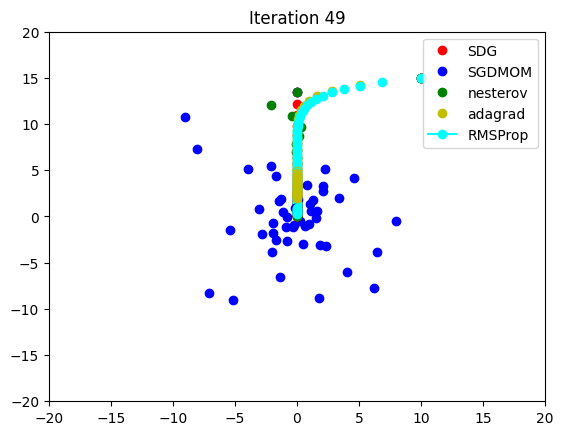

In [71]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#run above cells and this cell to get the anime clif without any cache save of previous pics



# Define a function to update the plot in each iteration
def update_plot(i):
    #fix the scales of the axises
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    plt.plot(sgd[i][0], sgd[i][1], 'ro')
    plt.plot(sgdmom[i][0], sgdmom[i][1], 'bo')
    plt.plot(nesterov[i][0], nesterov[i][1], 'go')
    plt.plot(adagrad[i][0], adagrad[i][1], 'yo')
    plt.plot(rmsprop[i][0], rmsprop[i][1], color='cyan',marker='o')
    plt.legend(['SDG','SGDMOM','nesterov','adagrad','RMSProp'])
    plt.title(f'Iteration {i}')

# Create an animation of the iterations
fig = plt.figure()

#interval specifies time between two iterations
anim = FuncAnimation( fig,update_plot, frames=50, interval=200)

# to display the GIF in the jupyter notebook
HTML(anim.to_jshtml())

In [ ]:
####END###